# Домашняя работа №2

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [ ]:
Выборка - случайно выбранная часть элементов генеральной совокупности

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [ ]:
Зависит от объема генеральной совокупности и требуемого доверительного интервала

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [ ]:
1) каждый волос каждого футболиста
2) каждый волос на голове каждого футболиста
3) оценка средней длины волос на голове каждого футболиста

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
1) Случайная выборка обьемом n из генеральной совокупности
2) 10 случайных выборок по каждому году рождения объемом n/10

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


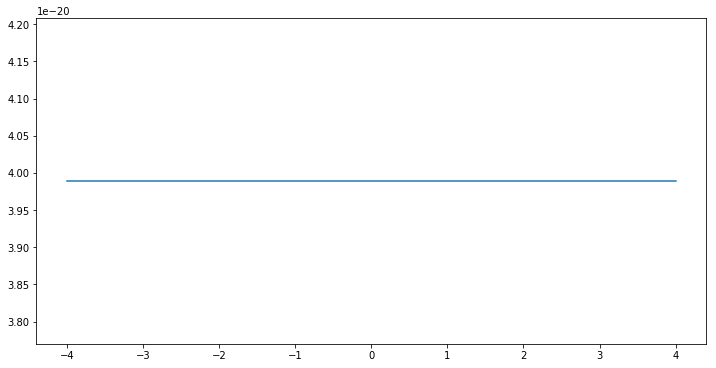

In [38]:
flat_dstr = sts.norm(0,9999999999999999999)

plt.figure(figsize=(12,6))

pdf = flat_dstr.pdf(x)
plt.plot(x, pdf)

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [103]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[25]
mean = sample.mean()

#your code here
overshoot = 999
np.put(sample,50,overshoot)
new_med = sorted(sample)[25]
new_mean = sample.mean()


print(med,mean)
print(new_med,new_mean)
#медиана не изменится/изменится незначительно. 
#среднее значение изменится тем сильнее, чем дальше будет вброс от среднего


4.027065203097815 4.061770729910222
4.027065203097815 23.56506114436573


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [95]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
clean_mean = sample.mean()

mean_with_c = np.sum([sample[i] + C for i in range (0,100)])/100

mean_mult_c = np.sum([sample[i] * C for i in range (0,100)])/100

print (clean_mean, mean_with_c, mean_mult_c,)
#При добавлении к каждому элементу констатны среднее изменится на величину константы
#При умножении каждого элемента на константу среднее изменится в равное константе количество раз
print (clean_mean, clean_mean + C, clean_mean * C)

2.14 2.64 1.07
2.14 2.64 1.07


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [109]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = 99
np.put(sample,49,overshoot)
new_var = sample.var()

print (var, new_var)

1.155620464014971 174.46411824520212


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [129]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
import math
mean_simple = sum(sample)/1000
iq_range = sorted(sample)[(1000//4)*3] - sorted(sample)[1000//4]
var_range = 2*(1 / (1000 - 1) * np.sum([(sample[i] - mean_simple)**2 for i in range(1000)]))
print(iq_range,var_range)

1.323699947095546 1.9352865957397918


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [167]:
beta_rv = stats.beta(1,3)
#your code here
sample_beta = beta_rv.rvs(100)
mean = sample_beta.mean()
mean
#статистика - измеримая числовая функция от выборки

0.28130046878371195

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [170]:
gamma_rv = stats.gamma(2,2)
sample_gamma = gamma_rv.rvs(100)
#your code here
mean = sample_gamma.mean() #матожидание
var = sample_gamma.var()   #дисперсия
med = np.median(sample_gamma)   #медиана

print(mean)
print(var)
print(med)

4.00999702112065
1.9586003553058975
3.769145704042213


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

/home/levprltsk/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$x avg$')

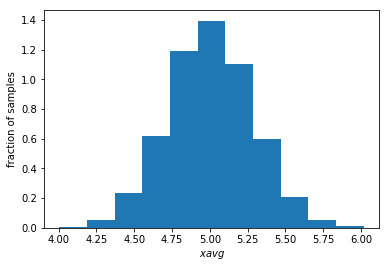

In [7]:
#your code here
norm_rv = sts.norm(5,2)

mean_array=[]
for i in range(10000):
    sample = norm_rv.rvs(50)
    mean_array.append(sample.mean())

plt.hist(mean_array, 11, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x avg$')


- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

/home/levprltsk/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$x avg$')

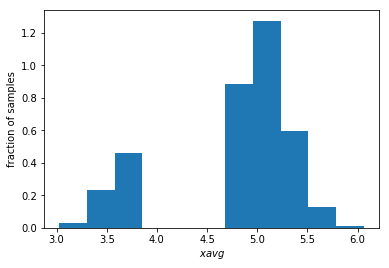

In [10]:
#your code here
mean_array=[]
for i in range(10000):
    sample = norm_rv.rvs(50)
    if sample.mean() < 4.75:
        mean_array.append(sample.mean()-1)
    else:
        mean_array.append(sample.mean())

plt.hist(mean_array, 11, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x avg$')


- Сделайте z-преобразование для данного распределения

In [26]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(10000)
sample_z = []
new_z = 0
mean_z = 0
for i in range (10000):
    new_z = (sample[i]-sample.mean())/sample.var()
    sample_z.append(new_z)
    mean_z +=new_z

print(mean_z/10000)

-3.289146732754489e-16


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [27]:
#your code here
chisqr_rv = sts.chi2(10)
chisqr_rv.ppf(0.9)

15.987179172105263

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [28]:
#your code here
stud_rv=sts.t(15)
print (stud_rv.ppf(0.9),stud_rv.ppf(0.95))

1.3406056078504547 1.7530503556925547


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [29]:
norm_rv = sts.norm(0, 2)
#your code here
small_sample = norm_rv.rvs(50)
large_sample = norm_rv.rvs(500)
print (small_sample.ppf(0.9),large_sample.ppf(0.9))

AttributeError: 'numpy.ndarray' object has no attribute 'ppf'

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here
Ошибка второго рода

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.


In [ ]:
#your answer here
1) не верно
2) не верно
3) верно 

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here
для отклонения предпочтительнее 0.01
99% ДИ - хорошая оценка


## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

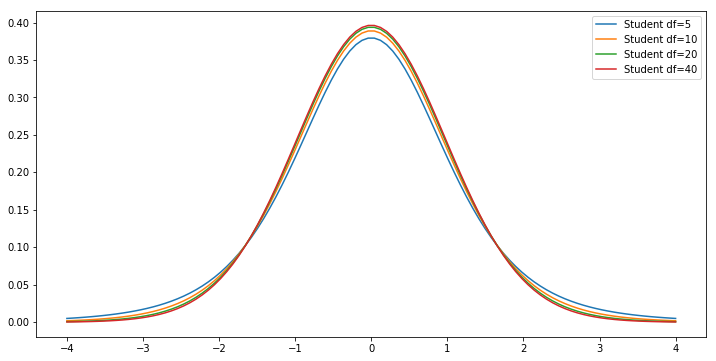

In [31]:
#your code here

t_rv5 = sts.t(5)
t_rv10 = sts.t(10)
t_rv20 = sts.t(20)
t_rv40 = sts.t(40)
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

pdf = t_rv5.pdf(x)
plt.plot(x, pdf)
pdf_2 = t_rv10.pdf(x)
plt.plot(x, pdf_2)
pdf_3 = t_rv20.pdf(x)
plt.plot(x, pdf_3)
pdf_4 = t_rv40.pdf(x)
plt.plot(x, pdf_4)

plt.legend(['Student df=5', 'Student df=10', 'Student df=20', 'Student df=40'])

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [37]:
#your code here
a =[1,2,3,4,5,6,7,8,9,5,3]
b =[30,29,28,27,26,25,24,23,22,26,28] 
sts.pearsonr(a,b)

data = 
sns.pairplot(a,b)


TypeError: 'data' must be pandas DataFrame object, not: <class 'list'>

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [ ]:
#your code here

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [ ]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here